## Project: Wrangle-Act

## Table of Contents
- [Introduction](#intro)
- [Part I - Gathering Data](#gather)
- [Part II - Assessing Data](#assess)
- [Part III - Cleaning Data](#clean)
- [Part	IV - Visual Analysis](#insights)


<a id='intro'></a>
### Introduction

<a id='gather'></a>
### Gathering Data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import requests 
import json

In [2]:
#Read data from csv file
archive=pd.read_csv('twitter-archive-enhanced.csv')
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [3]:
#Downloading a file programmatically from the Udacity server
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name='image-predictions.tsv'
response=requests.get(url)
with open(file_name,mode='wb') as file:
    file.write(response.content)

In [4]:
#Read data from tsv file 
image_pre=pd.read_csv('image-predictions.tsv',sep='\t')

In [5]:
#Gather data from Twitter API
import tweepy
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [7]:
#Write Json data to 'tweet_json.txt' file with each tweet's json data on its own line
tweet_id_list=list(archive.tweet_id)
file_name='tweet_json.txt'
file = open(file_name,"a") 

for i in range(len(tweet_id_list)):
    print("Processing: " + str(i))
    statusLookup = api.statuses_lookup([tweet_id_list[i]])
    if(len(statusLookup) == 0):
        continue
    else:
        file.write(json.dumps(statusLookup[0]._json))
        file.write("\n")

file.close() 

Processing: 0
Processing: 1
Processing: 2
Processing: 3
Processing: 4
Processing: 5
Processing: 6
Processing: 7
Processing: 8
Processing: 9
Processing: 10
Processing: 11
Processing: 12
Processing: 13
Processing: 14
Processing: 15
Processing: 16
Processing: 17
Processing: 18
Processing: 19
Processing: 20
Processing: 21
Processing: 22
Processing: 23
Processing: 24
Processing: 25
Processing: 26
Processing: 27
Processing: 28
Processing: 29
Processing: 30
Processing: 31
Processing: 32
Processing: 33
Processing: 34
Processing: 35
Processing: 36
Processing: 37
Processing: 38
Processing: 39
Processing: 40
Processing: 41
Processing: 42
Processing: 43
Processing: 44
Processing: 45
Processing: 46
Processing: 47
Processing: 48
Processing: 49
Processing: 50
Processing: 51
Processing: 52
Processing: 53
Processing: 54
Processing: 55
Processing: 56
Processing: 57
Processing: 58
Processing: 59
Processing: 60
Processing: 61
Processing: 62
Processing: 63
Processing: 64
Processing: 65
Processing: 66
Proce

Processing: 520
Processing: 521
Processing: 522
Processing: 523
Processing: 524
Processing: 525
Processing: 526
Processing: 527
Processing: 528
Processing: 529
Processing: 530
Processing: 531
Processing: 532
Processing: 533
Processing: 534
Processing: 535
Processing: 536
Processing: 537
Processing: 538
Processing: 539
Processing: 540
Processing: 541
Processing: 542
Processing: 543
Processing: 544
Processing: 545
Processing: 546
Processing: 547
Processing: 548
Processing: 549
Processing: 550
Processing: 551
Processing: 552
Processing: 553
Processing: 554
Processing: 555
Processing: 556
Processing: 557
Processing: 558
Processing: 559
Processing: 560
Processing: 561
Processing: 562
Processing: 563
Processing: 564
Processing: 565
Processing: 566
Processing: 567
Processing: 568
Processing: 569
Processing: 570
Processing: 571
Processing: 572
Processing: 573
Processing: 574
Processing: 575
Processing: 576
Processing: 577
Processing: 578
Processing: 579
Processing: 580
Processing: 581
Processi

Processing: 1031
Processing: 1032
Processing: 1033
Processing: 1034
Processing: 1035
Processing: 1036
Processing: 1037
Processing: 1038
Processing: 1039
Processing: 1040
Processing: 1041
Processing: 1042
Processing: 1043
Processing: 1044
Processing: 1045
Processing: 1046
Processing: 1047
Processing: 1048
Processing: 1049
Processing: 1050
Processing: 1051
Processing: 1052
Processing: 1053
Processing: 1054
Processing: 1055
Processing: 1056
Processing: 1057
Processing: 1058
Processing: 1059
Processing: 1060
Processing: 1061
Processing: 1062
Processing: 1063
Processing: 1064
Processing: 1065
Processing: 1066
Processing: 1067
Processing: 1068
Processing: 1069
Processing: 1070
Processing: 1071
Processing: 1072
Processing: 1073
Processing: 1074
Processing: 1075
Processing: 1076
Processing: 1077
Processing: 1078
Processing: 1079
Processing: 1080
Processing: 1081
Processing: 1082
Processing: 1083
Processing: 1084
Processing: 1085
Processing: 1086
Processing: 1087
Processing: 1088
Processing: 10

Processing: 1513
Processing: 1514
Processing: 1515
Processing: 1516
Processing: 1517
Processing: 1518
Processing: 1519
Processing: 1520
Processing: 1521
Processing: 1522
Processing: 1523
Processing: 1524
Processing: 1525
Processing: 1526
Processing: 1527
Processing: 1528
Processing: 1529
Processing: 1530
Processing: 1531
Processing: 1532
Processing: 1533
Processing: 1534
Processing: 1535
Processing: 1536
Processing: 1537
Processing: 1538
Processing: 1539
Processing: 1540
Processing: 1541
Processing: 1542
Processing: 1543
Processing: 1544
Processing: 1545
Processing: 1546
Processing: 1547
Processing: 1548
Processing: 1549
Processing: 1550
Processing: 1551
Processing: 1552
Processing: 1553
Processing: 1554
Processing: 1555
Processing: 1556
Processing: 1557
Processing: 1558
Processing: 1559
Processing: 1560
Processing: 1561
Processing: 1562
Processing: 1563
Processing: 1564
Processing: 1565
Processing: 1566
Processing: 1567
Processing: 1568
Processing: 1569
Processing: 1570
Processing: 15

Processing: 1995
Processing: 1996
Processing: 1997
Processing: 1998
Processing: 1999
Processing: 2000
Processing: 2001
Processing: 2002
Processing: 2003
Processing: 2004
Processing: 2005
Processing: 2006
Processing: 2007
Processing: 2008
Processing: 2009
Processing: 2010
Processing: 2011
Processing: 2012
Processing: 2013
Processing: 2014
Processing: 2015
Processing: 2016
Processing: 2017
Processing: 2018
Processing: 2019
Processing: 2020
Processing: 2021
Processing: 2022
Processing: 2023
Processing: 2024
Processing: 2025
Processing: 2026
Processing: 2027
Processing: 2028
Processing: 2029
Processing: 2030
Processing: 2031
Processing: 2032
Processing: 2033
Processing: 2034
Processing: 2035
Processing: 2036
Processing: 2037
Processing: 2038
Processing: 2039
Processing: 2040
Processing: 2041
Processing: 2042
Processing: 2043
Processing: 2044
Processing: 2045
Processing: 2046
Processing: 2047
Processing: 2048
Processing: 2049
Processing: 2050
Processing: 2051
Processing: 2052
Processing: 20

In [5]:
#Count the lines within the "tweet_json.txt" file 
file = open("tweet_json.txt", "r")

number_of_lines = 0

for line in file:
    number_of_lines += 1

file.close()
print(number_of_lines)

2331


In [6]:
#Extract elements of json to dataframe
i=0
tweet_id=[]
retweet_count=[]
favorite_count=[]
retweeted=[]
favorited=[]

with open("tweet_json.txt", encoding='utf-8') as file:
    while i<number_of_lines:
        jsonLine = file.readline()[:-1]
        i+=1
        tweet_id.append(json.loads(jsonLine)['id'])
        retweet_count.append(json.loads(jsonLine)['retweet_count'])
        favorite_count.append(json.loads(jsonLine)['favorite_count'])
        favorited.append(json.loads(jsonLine)['favorited'])
        retweeted.append(json.loads(jsonLine)['retweeted'])
        
df_api_extract=pd.DataFrame(
    {"tweet_id":tweet_id,
     "retweet_count":retweet_count,
     "retweeted":retweeted,
     "favorite_count":favorite_count,
     "favorited":favorited
     
     
})
df_api_extract

,tweet_id,retweet_count,retweeted,favorite_count,favorited
0,892420643555336193,7554,False,35731,False
1,892177421306343426,5598,False,30872,False
2,891815181378084864,3709,False,23224,False
3,891689557279858688,7739,False,39021,False
4,891327558926688256,8335,False,37280,False
...,...,...,...,...,...
2326,666049248165822465,40,False,96,False
2327,666044226329800704,127,False,265,False
2328,666033412701032449,40,False,111,False
2329,666029285002620928,42,False,120,False


<a id='assess'></a>
### Assessing Data

In [9]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [40]:
archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [10]:
archive['timestamp'].value_counts()

2017-01-05 17:13:55 +0000    1
2015-12-01 03:18:27 +0000    1
2015-12-08 03:57:26 +0000    1
2017-06-11 00:25:14 +0000    1
2015-12-14 16:34:00 +0000    1
                            ..
2016-09-01 16:14:48 +0000    1
2017-02-13 22:03:49 +0000    1
2015-12-05 03:41:37 +0000    1
2017-01-12 16:54:26 +0000    1
2015-11-24 01:42:25 +0000    1
Name: timestamp, Length: 2356, dtype: int64

In [11]:
archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
sum(archive['tweet_id'].duplicated())

0

In [13]:
archive.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

In [14]:
'the' in archive.name

False

In [15]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [7]:
archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [36]:
archive[archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [35]:
print(archive.text[45])
print(archive.rating_numerator[5])

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
13


In [17]:
archive.query('rating_denominator==0')['text'][313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [18]:
image_pre

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [19]:
image_pre.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
image_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df_api_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   retweeted       2331 non-null   bool 
 3   favorite_count  2331 non-null   int64
 4   favorited       2331 non-null   bool 
dtypes: bool(2), int64(3)
memory usage: 59.3 KB


#### Quality Issues
##### `archive` table

- Timestamp is incorrectly of string data type, instead of datetime
- Timestamp includes a timezone of +0000, which is irrelevant
- rating_denominator is not 10 sometimes
- rating_denominator is 0 in one case, which is invalid
- rating numerator is incorrectly of int, instead of float
- rating numerators are incorrect sometimes, showing only the digits after the decimal place
- Some values in the doggo,floofer,popper and pappo columns are invalid, such as "None"
- Some values in the name column are invalid, such as "None" and "a"
- Source is in html format
- Missing calculated rating, which is the rating_numerator/rating_denominator

####  `image_pre` table
- The image predictions are not consistent in capitalization
- The image predictions include underscores

#### Tidiness Issues

- The metrics extracted using tweepy, namely retweets and favorites, should be joined into the `archive` table
- There are multiple dog stages columns present e.g. "doggo", "pupper", etc. They should be merged into 1 column

<a id='clean'></a>
### Data Cleaning

In [7]:
archive_clean= archive.copy()
image_pre_clean= image_pre.copy()
df_api_extract_clean=df_api_extract.copy()

#### Missing Data

##### Define
Recalculate the `rating` column:rating_numerator/rating_denominator

##### Code

In [8]:
archive_clean['rating']=archive_clean.rating_numerator/archive_clean.rating_denominator

##### Test

In [9]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Tidiness 

- There are multiple dog stages columns present e.g. "doggo", "pupper", etc. They should be merged into 1 column

#### Define
Concatenate all 4 columns to 1 column dog_stage

#### Code

In [10]:
archive_clean[['doggo','floofer','pupper','puppo']]=archive_clean[['doggo','floofer','pupper','puppo']].replace('None',"")
archive_clean['dog_stage']=archive_clean['doggo']+archive_clean['floofer']+archive_clean['pupper']+archive_clean['puppo']
archive_clean[['doggo','floofer','pupper','puppo']]=archive_clean[['doggo','floofer','pupper','puppo']].replace('',np.nan)
archive_clean['dog_stage']=archive_clean['dog_stage'].replace('',np.nan)


In [11]:
archive_clean=archive_clean.drop(columns=['doggo','floofer','pupper','puppo'])

#### Test

In [12]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  rating                      2356 

##### Define
Merge the *df_api_extract_clean* column to the `archive` table, joining on *tweet_id*.

#####  Code

In [13]:
archive_clean=pd.merge(archive_clean,df_api_extract_clean,how='left',on='tweet_id')

##### Test

In [14]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  rating                      2356 

In [15]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,retweet_count,retweeted,favorite_count,favorited
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,NaN,7554.0,False,35731.0,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,NaN,5598.0,False,30872.0,False
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,NaN,3709.0,False,23224.0,False
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,NaN,7739.0,False,39021.0,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,NaN,8335.0,False,37280.0,False


### Quality

- timestamp is incorrectly of string data type, instead of datetime

##### Define
Convert str to datetime using pd.to_datetime

In [16]:
archive_clean.timestamp=pd.to_datetime(archive_clean.timestamp)

##### Test

In [17]:
archive_clean['timestamp'].dtypes

datetime64[ns, UTC]

- timestamp includes a timezone of +0000, which is irrelevant

#####  Define
Remove timezone from datetime using dt.tz_localize(None)

##### Code

In [18]:
archive_clean.timestamp=archive_clean.timestamp.dt.tz_localize(None)

##### Test

In [19]:
archive_clean.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2351   2015-11-16 00:24:50
2352   2015-11-16 00:04:52
2353   2015-11-15 23:21:54
2354   2015-11-15 23:05:30
2355   2015-11-15 22:32:08
Name: timestamp, Length: 2356, dtype: datetime64[ns]

- rating-denominator is 0 in one case which is invalid

##### Define
Replace the invalid rating_denominator of 0 with correct rating by reviewing the text

In [20]:
archive_clean.query('rating_denominator==0')['text'][313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

##### Code

In [21]:
#based on the text, the rating should be 13/10
archive_clean["rating_numerator"][313] = 13
archive_clean["rating_denominator"][313] = 10

C:\Users\yang-\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\yang-\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


##### Test

In [22]:
archive_clean.query('rating_denominator==0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,retweet_count,retweeted,favorite_count,favorited


- rating-denominator ist not 10 sometimes
 

In [23]:
# Code
archive_clean.rating_numerator = archive_clean.rating_numerator * 10 / archive_clean.rating_denominator
archive_clean.rating_denominator=10

##### Test

In [24]:
archive_clean['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

In [25]:
archive_clean.rating=archive_clean.rating_numerator/archive_clean.rating_denominator
archive_clean.query('rating==inf')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,retweet_count,retweeted,favorite_count,favorited


- rating numerators are incorrect sometimes, showing only the digits after the decimal place. In such cases, the rating numerator will have to be re-extracted correctly from the Tweet text using regular expressions

#### Define

In [26]:
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\yang-\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
340,"RT @dog_rates: This is Logan, the Chow who liv...",75.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1689,I've been told there's a slight possibility he...,5.0
1712,Here we have uncovered an entire battalion of ...,26.0


In [27]:
rating_in_decimals=archive_clean.text.str.extract(r"(\d+\.\d*\/\d+)")


for i in range(archive_clean.shape[0]):
    if pd.isnull(rating_in_decimals[0][i]):
            continue
    else:
        archive_clean['rating_numerator'][i] = rating_in_decimals[0][i].split('/')[0]

     
    
    
    

C:\Users\yang-\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Test

In [28]:
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']] 

C:\Users\yang-\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
340,"RT @dog_rates: This is Logan, the Chow who liv...",9.75
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1689,I've been told there's a slight possibility he...,9.50
1712,Here we have uncovered an entire battalion of ...,11.26


In [29]:
# Check the type of rating_denominator 
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   float64       
 11  rating_denominator          2356 non-null   int64       

- Some values in the name column are invalid, such as "None" and "a"

##### Define
Raplace invalid names("None" and "a") with np.nan

##### Code

In [30]:
archive_clean.name=archive_clean.name.replace(['None','a'],np.nan)

##### Test

In [31]:
archive_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351         NaN
2352         NaN
2353         NaN
2354         NaN
2355         NaN
Name: name, Length: 2356, dtype: object

- source is in html format

##### Define
Using BeautifulSoup to extract the source part from html. 

In [32]:
source_list=[]
i=0
for i in range(archive_clean.shape[0]):
    from bs4 import BeautifulSoup 
    soup=BeautifulSoup(archive_clean.source[i])
    source_list.append(str(soup.find('a').contents[0]).strip())
    i+=1
source_list


['Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter for iPhone',
 'Twitter f

In [33]:
archive_clean['source_list']=source_list

##### Test

In [34]:
archive_clean['source_list'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source_list, dtype: int64

####  `image_pre` table

- The image predictions are not consistent in capitalization

##### Define
Convert all upper characters in p1 into lowercase characters using str.lower()

#### Code

In [35]:
image_pre_clean.p1=image_pre_clean.p1.str.lower()
image_pre_clean.p2=image_pre_clean.p2.str.lower()
image_pre_clean.p3=image_pre_clean.p3.str.lower()

##### Test

In [38]:
image_pre_clean.p1

0       welsh_springer_spaniel
1                      redbone
2              german_shepherd
3          rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071               paper_towel
2072                 chihuahua
2073                 chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object

- The image predictions include underscores

#####  Define
Replace underscores with space

##### Code

In [39]:
image_pre_clean.p1=image_pre_clean.p1.str.replace('_',' ')
image_pre_clean.p2=image_pre_clean.p2.str.replace('_',' ')
image_pre_clean.p3=image_pre_clean.p3.str.replace('_',' ')

##### Test

In [40]:
image_pre_clean.p1

0       welsh springer spaniel
1                      redbone
2              german shepherd
3          rhodesian ridgeback
4           miniature pinscher
                 ...          
2070                    basset
2071               paper towel
2072                 chihuahua
2073                 chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object

In [41]:
# Save combined and cleaned data to twitter_archive_master.csv
twitter_archive_master=pd.merge(archive_clean,image_pre_clean,how='left',on='tweet_id')
twitter_archive_master
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

<a id='insights'></a>
### Visual Analysis 

In [42]:
df=pd.read_csv('twitter_archive_master.csv')
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,1.0,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,1.0,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,1.0,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,1.0,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True


#### 1. Research Question
What are the most popular dog names according this data? 

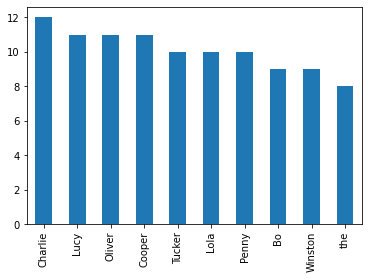

In [43]:
import matplotlib.pyplot as plt
df['name'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

#### Conclusion
Charlie is the most frequently used dog name. The 10 most popular dog names are: Charlie, Cooper, Olivier, Lucy, Penny, Tucker, Lola, Winston, Bo and Sadie.

#### 2. Research Question
Do more favoriets lead to more retweeets? 

In [44]:
df['retweeted'].value_counts()

False    2331
Name: retweeted, dtype: int64

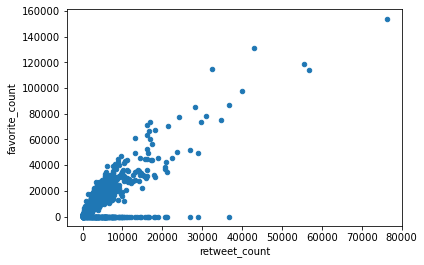

In [45]:
df.plot(x='retweet_count',y='favorite_count',kind='scatter')

#### Conclusion
More favorites lead to more retweets.

#### 3. Research Question
Do retweets increase with the age of the account? 

In [46]:
import datetime
df['month_year']=pd.to_datetime(df['timestamp']).dt.to_period('M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype    
---  ------                      --------------  -----    
 0   tweet_id                    2356 non-null   int64    
 1   in_reply_to_status_id       78 non-null     float64  
 2   in_reply_to_user_id         78 non-null     float64  
 3   timestamp                   2356 non-null   object   
 4   source                      2356 non-null   object   
 5   text                        2356 non-null   object   
 6   retweeted_status_id         181 non-null    float64  
 7   retweeted_status_user_id    181 non-null    float64  
 8   retweeted_status_timestamp  181 non-null    object   
 9   expanded_urls               2297 non-null   object   
 10  rating_numerator            2356 non-null   float64  
 11  rating_denominator          2356 non-null   int64    
 12  name                        1556 non-null   object   
 13  rat

In [47]:
avg_retweets_by_month=df.groupby(['month_year'])['retweet_count'].mean().to_frame()
avg_retweets_by_month = avg_retweets_by_month.rename(columns={'retweet_count':'average_retweet_count'})

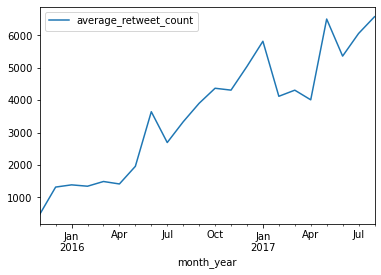

In [48]:
avg_retweets_by_month.plot(kind='line')

#### Conclusion
Retweets tend to increase with the age of the account

#### 4. Research Question
what kinds of dogs are the most tweeted in this account according to p1?

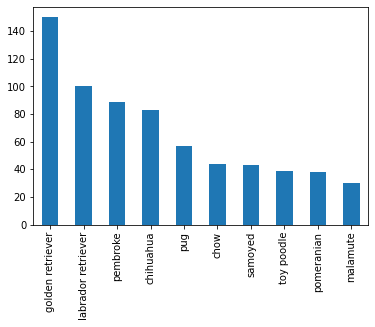

In [49]:
df_real_dog=df[df['p1_dog']==True]
df_real_dog['p1'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

#### Conclusion
The golden retriever is the most common dog among the tweets from this account. 